<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/%20/%20modul3_machine_learning%20/%20Modul_3_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## CONTENT BASED RECOMMENDATION SYSTEM

### With Similarity Measure

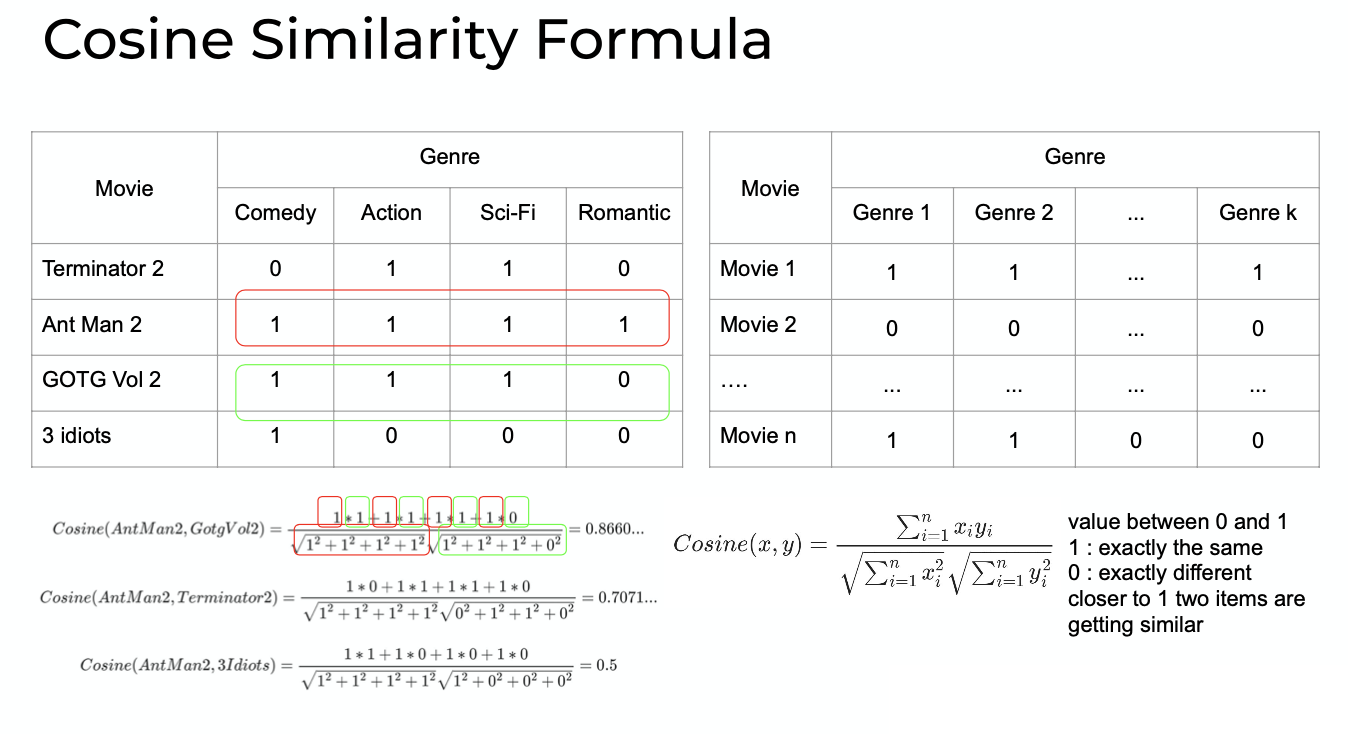

In [ ]:
terminator_2 = [0,1,1,0]
ant_man_2 = [1,1,1,1]
gotg_vol_2 = [1,1,1,0]
three_idiots = [1,0,0,0]

In [ ]:
movie_genre_dict = {
    'Terminator 2' : terminator_2,
    'Ant Man 2'    : ant_man_2,
    'GOTG Vol 2'   : gotg_vol_2,
    '3 Idiots'     : three_idiots
}

In [ ]:
movie_genre = pd.DataFrame.from_dict(movie_genre_dict, orient='index')
movie_genre.columns = ['Comedy', 'Action', 'Sci-Fi', 'Romantic']

In [ ]:
movie_genre

,Comedy,Action,Sci-Fi,Romantic
Terminator 2,0,1,1,0
Ant Man 2,1,1,1,1
GOTG Vol 2,1,1,1,0
3 Idiots,1,0,0,0


Cosine Similarity Between Movie

In [ ]:
cos_ant_gotg = np.sum(np.multiply(ant_man_2, gotg_vol_2))/(np.sqrt(np.sum(np.power(ant_man_2,2))) * np.sqrt(np.sum(np.power(gotg_vol_2,2))))
cos_ant_gotg

0.8660254037844387

In [ ]:
cos_ant_trmntr = np.sum(np.multiply(ant_man_2, terminator_2))/(np.sqrt(np.sum(np.power(ant_man_2,2))) * np.sqrt(np.sum(np.power(terminator_2,2))))
cos_ant_trmntr

0.7071067811865475

In [ ]:
cos_ant_idiot = np.sum(np.multiply(ant_man_2, three_idiots))/(np.sqrt(np.sum(np.power(ant_man_2,2))) * np.sqrt(np.sum(np.power(three_idiots,2))))
cos_ant_idiot

0.5

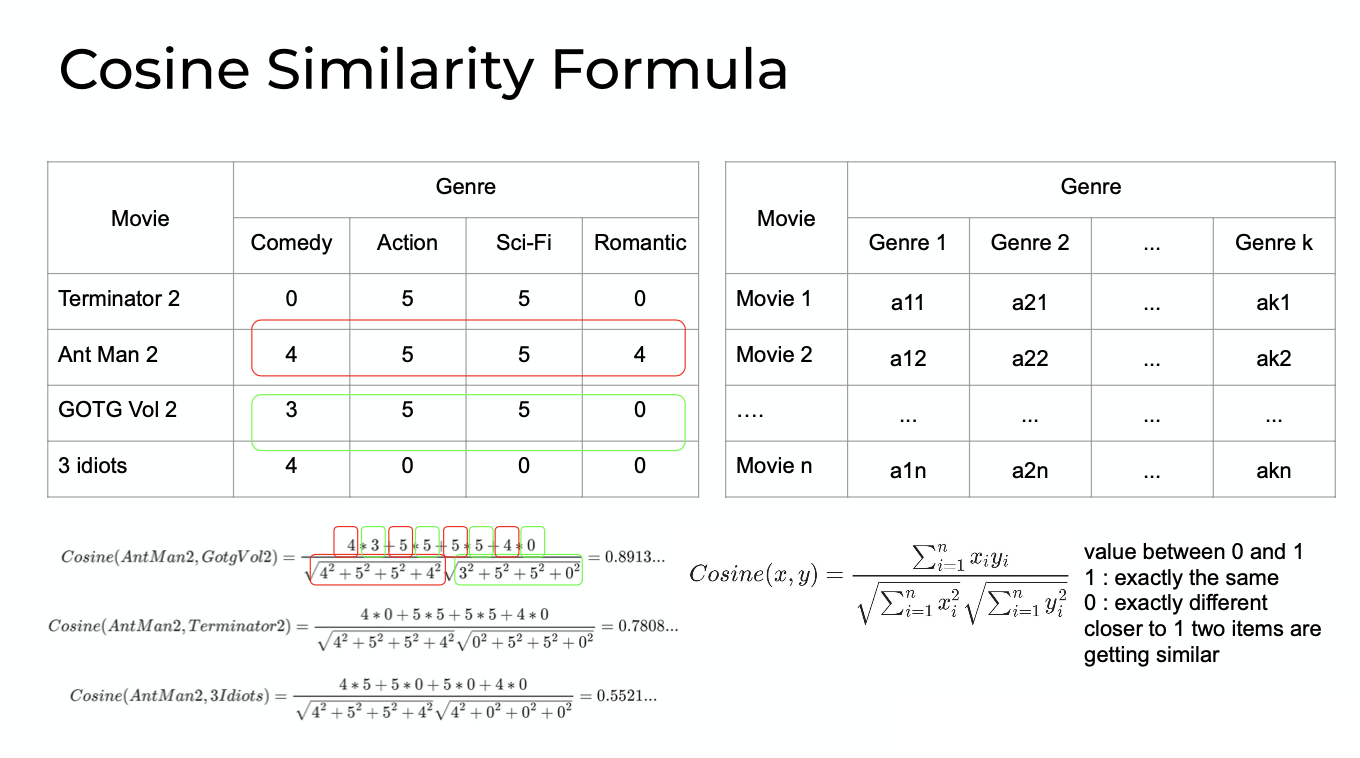

In [ ]:
terminator_2 = [0,5,5,0]
ant_man_2 = [4,5,5,4]
gotg_vol_2 = [3,5,5,0]
three_idiots = [4,0,0,0]

In [ ]:
movie_genre_dict2 = {
    'Terminator 2' : terminator_2,
    'Ant Man 2'    : ant_man_2,
    'GOTG Vol 2'   : gotg_vol_2,
    '3 Idiots'     : three_idiots
}

In [ ]:
movie_genre2 = pd.DataFrame.from_dict(movie_genre_dict, orient='index')
movie_genre2.columns = ['Comedy', 'Action', 'Sci-Fi', 'Romantic']

In [ ]:
movie_genre2

,Comedy,Action,Sci-Fi,Romantic
Terminator 2,0,1,1,0
Ant Man 2,1,1,1,1
GOTG Vol 2,1,1,1,0
3 Idiots,1,0,0,0


In [ ]:
cos_ant_gotg2 = np.sum(np.multiply(ant_man_2, gotg_vol_2))/(np.sqrt(np.sum(np.power(ant_man_2,2))) * np.sqrt(np.sum(np.power(gotg_vol_2,2))))
cos_ant_gotg2

0.891371527293353

In [ ]:
cos_ant_trmntr2 = np.sum(np.multiply(ant_man_2, terminator_2))/(np.sqrt(np.sum(np.power(ant_man_2,2))) * np.sqrt(np.sum(np.power(terminator_2,2))))
cos_ant_trmntr2

0.7808688094430302

In [ ]:
cos_ant_idiot2 = np.sum(np.multiply(ant_man_2, three_idiots))/(np.sqrt(np.sum(np.power(ant_man_2,2))) * np.sqrt(np.sum(np.power(three_idiots,2))))
cos_ant_idiot2

0.44172610429938614

### Content Based Filtering

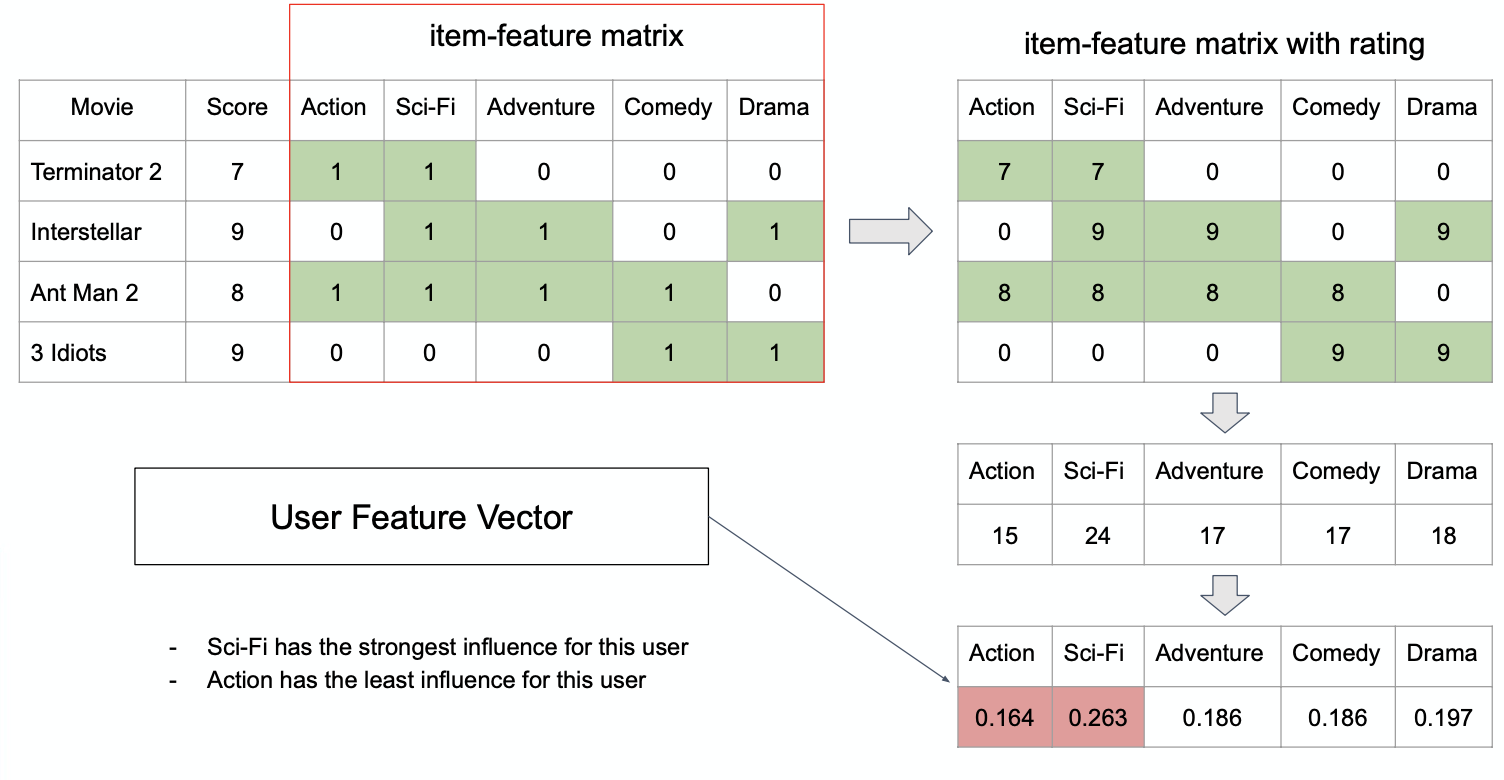

In [ ]:
terminator_2 = [1,1,0,0,0]
interstellar = [0,1,1,0,1]
ant_man_2 = [1,1,1,1,0]
three_idiots = [0,0,0,1,1]

In [ ]:
score = np.array([7,9,8,9]).reshape(4,1)

In [ ]:
item_feature_dict = {
    'Terminator 2' : terminator_2,
    'Interstellar'    : interstellar,
    'Ant Man 2'   : ant_man_2,
    '3 Idiots'     : three_idiots
}

In [ ]:
item_feature = pd.DataFrame.from_dict(item_feature_dict, orient='index')
item_feature.columns = ['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'Drama']

Item Feature Ranking

In [ ]:
item_feature

,Action,Sci-Fi,Adventure,Comedy,Drama
Terminator 2,1,1,0,0,0
Interstellar,0,1,1,0,1
Ant Man 2,1,1,1,1,0
3 Idiots,0,0,0,1,1


In [ ]:
item_feature_ranking = item_feature * score
item_feature_ranking

,Action,Sci-Fi,Adventure,Comedy,Drama
Terminator 2,7,7,0,0,0
Interstellar,0,9,9,0,9
Ant Man 2,8,8,8,8,0
3 Idiots,0,0,0,9,9


User Feature Vector

In [ ]:
sum_cols = item_feature_ranking.sum(axis=0)
user_feature_vector = sum_cols/np.sum(sum_cols)

In [ ]:
user_feature_vector= np.array(user_feature_vector).reshape(1,5)

Recommendation

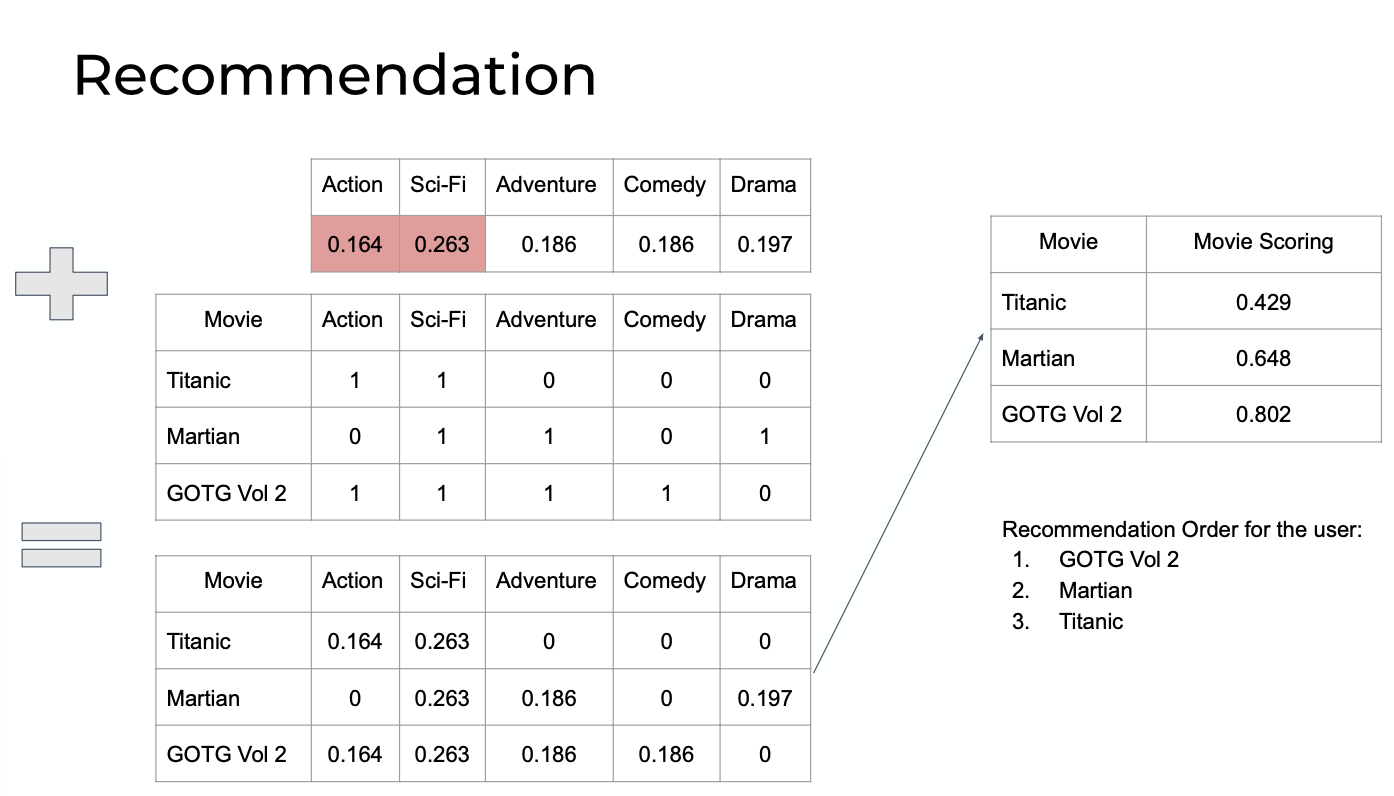

In [ ]:
titanic = [1,1,0,0,0]
martian = [0,1,1,0,1]
gotg_vol_2 = [1,1,1,1,0]

In [ ]:
new_movie_dict = {
    'Titanic' : titanic,
    'Martian'    : martian,
    'GOTG Vol 2'   : gotg_vol_2
}

In [ ]:
new_movie = pd.DataFrame.from_dict(new_movie_dict, orient='index')
new_movie.columns = ['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'Drama']

In [ ]:
movie_scoring = (user_feature_vector * new_movie).sum(axis=1)

In [ ]:
movie_scoring.sort_values(ascending=False)

GOTG Vol 2    0.802198
Martian       0.648352
Titanic       0.428571
dtype: float64

### Content Based Filtering for Multiple User

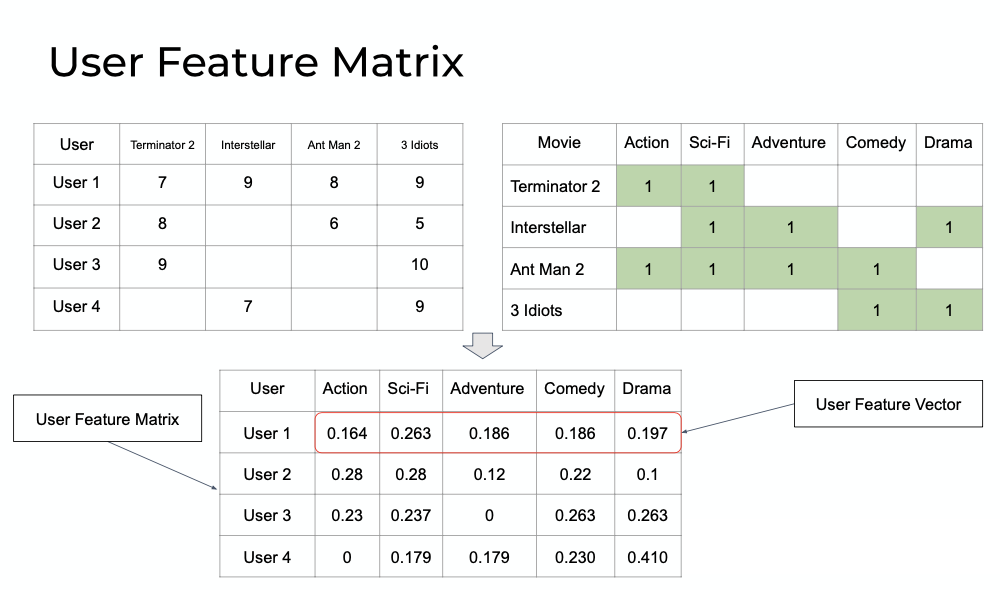

In [ ]:
user1 = [7,9,8,9]
user2 = [8,0,6,5]
user3 = [9,0,0,10]
user4 = [0,7,0,9]

In [ ]:
user_item_dict = {
    'User 1' : user1,
    'User 2' : user2,
    'User 3' : user3,
    'User 4' : user4
}

In [ ]:
user_item = pd.DataFrame.from_dict(user_item_dict, orient='index')
user_item.columns = ['Terminator 2', 'Interstellar', 'Ant Man 2', '3 Idiots']

In [ ]:
user_item

,Terminator 2,Interstellar,Ant Man 2,3 Idiots
User 1,7,9,8,9
User 2,8,0,6,5
User 3,9,0,0,10
User 4,0,7,0,9


In [ ]:
terminator_2 = [1,1,0,0,0]
interstellar = [0,1,1,0,1]
ant_man_2 = [1,1,1,1,0]
three_idiots = [0,0,0,1,1]

In [ ]:
item_feature_dict = {
    'Terminator 2' : terminator_2,
    'Interstellar' : interstellar,
    'Ant Man 2' : ant_man_2,
    '3 Idiots' : three_idiots
}

In [ ]:
item_feature = pd.DataFrame.from_dict(item_feature_dict, orient='index')
item_feature.columns = ['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'Drama']

In [ ]:
item_feature

,Action,Sci-Fi,Adventure,Comedy,Drama
Terminator 2,1,1,0,0,0
Interstellar,0,1,1,0,1
Ant Man 2,1,1,1,1,0
3 Idiots,0,0,0,1,1


In [ ]:
inferred_movie = []

for i in range(len(user_item)):
  np.array(user_item.iloc[i]).reshape(4,1)*item_feature
  movie_ranking = (np.array(user_item.iloc[i]).reshape(4,1)*item_feature).sum(axis=0)
  movie_ranking_ratio = np.array(movie_ranking/np.sum(movie_ranking))
  inferred_movie.append(list(movie_ranking_ratio.transpose()))

inferred_movie_df = pd.DataFrame(inferred_movie, columns=item_feature.columns, index=user_item.index)


In [ ]:
inferred_movie_df

,Action,Sci-Fi,Adventure,Comedy,Drama
User 1,0.164835,0.263736,0.186813,0.186813,0.197802
User 2,0.280000,0.280000,0.120000,0.220000,0.100000
User 3,0.236842,0.236842,0.000000,0.263158,0.263158
User 4,0.000000,0.179487,0.179487,0.230769,0.410256


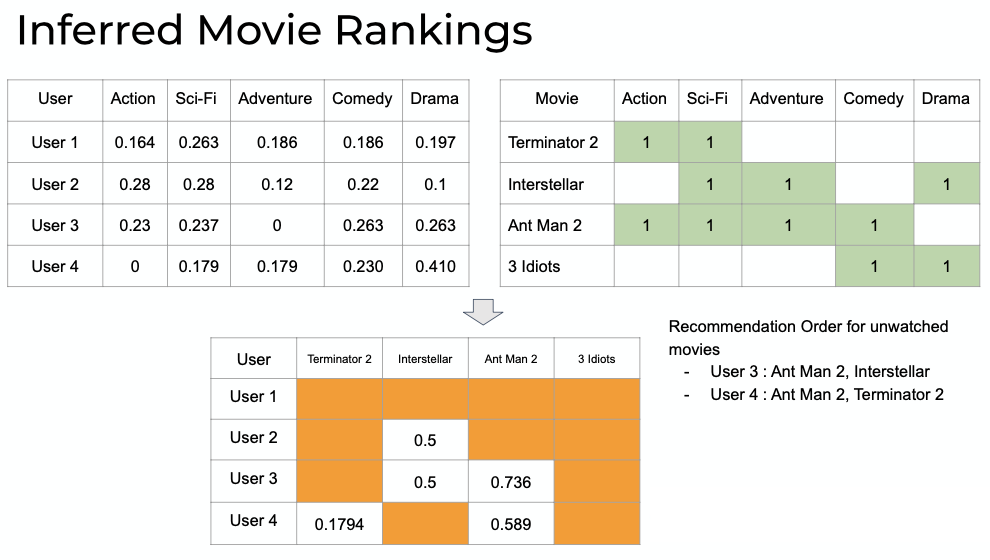

In [ ]:
item_feature

,Action,Sci-Fi,Adventure,Comedy,Drama
Terminator 2,1,1,0,0,0
Interstellar,0,1,1,0,1
Ant Man 2,1,1,1,1,0
3 Idiots,0,0,0,1,1


In [ ]:
item_feature.iloc[0] * inferred_movie_df.iloc[0]

Action       0.164835
Sci-Fi       0.263736
Adventure    0.000000
Comedy       0.000000
Drama        0.000000
dtype: float64

In [ ]:
user_item

,Terminator 2,Interstellar,Ant Man 2,3 Idiots
User 1,7,9,8,9
User 2,8,0,6,5
User 3,9,0,0,10
User 4,0,7,0,9


In [ ]:
recommendation = pd.DataFrame(columns=user_item.columns, index=user_item.index)
recommendation = recommendation.fillna(0)
recommendation

,Terminator 2,Interstellar,Ant Man 2,3 Idiots
User 1,0,0,0,0
User 2,0,0,0,0
User 3,0,0,0,0
User 4,0,0,0,0


In [ ]:
for i in range(user_item.shape[0]):
  for j in range(user_item.shape[1]):
    if user_item.iloc[i,j] == 0:
      recommendation.iloc[i,j]=(inferred_movie_df.iloc[i]*item_feature.iloc[j]).sum()


In [ ]:
recommendation

,Terminator 2,Interstellar,Ant Man 2,3 Idiots
User 1,0.000000,0.0,0.000000,0
User 2,0.000000,0.5,0.000000,0
User 3,0.000000,0.5,0.736842,0
User 4,0.179487,0.0,0.589744,0


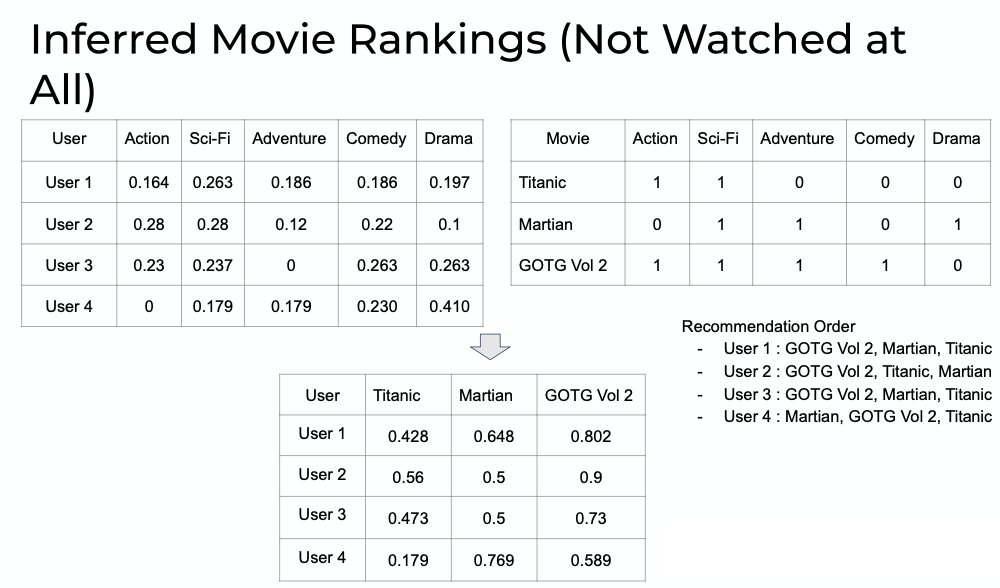

In [ ]:
titanic = [1,1,0,0,0]
martian=[0,1,1,0,1]
gotg_vol_2 = [1,1,1,1,0]

In [ ]:
new_movie_dict = {
    'Titanic' : titanic,
    'Martian' : martian,
    'GOTG Vol 2' : gotg_vol_2
}

In [ ]:
new_movie = pd.DataFrame.from_dict(new_movie_dict, orient='index')
new_movie.columns = ['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'Drama']

In [ ]:
new_movie

,Action,Sci-Fi,Adventure,Comedy,Drama
Titanic,1,1,0,0,0
Martian,0,1,1,0,1
GOTG Vol 2,1,1,1,1,0


In [ ]:
recommendation = pd.DataFrame(columns=new_movie.index, index=user_item.index)
recommendation = recommendation.fillna(0)
recommendation

,Titanic,Martian,GOTG Vol 2
User 1,0,0,0
User 2,0,0,0
User 3,0,0,0
User 4,0,0,0


In [ ]:
for i in range(inferred_movie_df.shape[0]):
  for j in range(new_movie.shape[0]):
    recommendation.iloc[i,j]=(inferred_movie_df.iloc[i]*new_movie.iloc[j]).sum()

In [ ]:
recommendation

,Titanic,Martian,GOTG Vol 2
User 1,0.428571,0.648352,0.802198
User 2,0.560000,0.500000,0.900000
User 3,0.473684,0.500000,0.736842
User 4,0.179487,0.769231,0.589744


## COLLABORATIVE FILTERING

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 250kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617674 sha256=b15d6c5797d847e019566cccab3a96b97fcfbcce6cd6b13d328c91e76a3844cb
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import Reader
from surprise import Dataset

from surprise import SVD
from surprise import BaselineOnly

from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.model_selection import GridSearchCV

In [ ]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [ ]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [ ]:
df.shape

(53154, 4)

In [ ]:
df = df.drop('timestamp', axis=1)

In [ ]:
df.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [ ]:
user_item_rating 

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df, reader=reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.3, random_state=2021)

SVD

In [ ]:
algo=SVD()
algo.fit(trainset)
prediction = algo.test(test_set)

In [ ]:
accuracy.rmse(prediction)

RMSE: 0.9643


0.9642970487079167

In [ ]:
accuracy.mae(prediction)

MAE:  0.7594


0.7594470803928451

ALS

In [ ]:
bsl_options = {'method': 'als',
               'n_epochs': 10,
               'reg_u': 15,
               'reg_i': 10
               }

In [ ]:
algo = BaselineOnly(bsl_options=bsl_options)
algo.fit(trainset)
prediction = algo.test(test_set)

Estimating biases using als...


In [ ]:
accuracy.rmse(prediction)

RMSE: 0.9621


0.9620595987874142

In [ ]:
accuracy.mae(prediction)

MAE:  0.7603


0.7602947786063213

Hyper Parameter Tuning

In [ ]:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

In [ ]:
gs = GridSearchCV(SVD, param_grid=param_grid, measures=['rmse','mae'],cv=5)

In [ ]:
gs.fit(data)

In [ ]:
trainset

In [ ]:
gs.best_params

{'mae': {'lr_all': 0.005, 'n_epochs': 10, 'reg_all': 0.4},
 'rmse': {'lr_all': 0.005, 'n_epochs': 10, 'reg_all': 0.4}}

In [ ]:
algo=SVD(lr_all=0.005, n_epochs=10, reg_all=0.4)
algo.fit(trainset)
prediction = algo.test(test_set)

In [ ]:
accuracy.rmse(prediction)

RMSE: 0.9802


0.9802395895644133